In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r"C:\Users\KIIT\Downloads\matches.csv")


In [49]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [51]:
df.shape

(756, 18)

In [53]:
df.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
161,162,IPL-2009,Port Elizabeth,16-05-2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
664,7922,IPL-2018,Bengaluru,29-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma
147,148,IPL-2009,Centurion,07-05-2009,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,A Singh,SuperSport Park,K Hariharan,DJ Harper,NaN
313,314,IPL-2012,Jaipur,08-04-2012,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,22,0,BJ Hodge,Sawai Mansingh Stadium,BF Bowden,VA Kulkarni,NaN
669,7927,IPL-2018,Indore,04-05-2018,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,AS Yadav,Holkar Cricket Stadium,S Ravi,Anil Dandekar,C Shamshuddin


In [55]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [57]:
df.duplicated().sum()

0

In [59]:
numeric=df.select_dtypes(include=['number'])
numeric.corr()

,id,dl_applied,win_by_runs,win_by_wickets
id,1.000000,-0.011658,-0.039403,-0.012239
dl_applied,-0.011658,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.011631,-0.560420,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [77]:
df.describe()
df['win_by_runs'].skew()
df['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [65]:
from ydata_profiling import ProfileReport
fofile=ProfileReport(df)
fofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 37.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

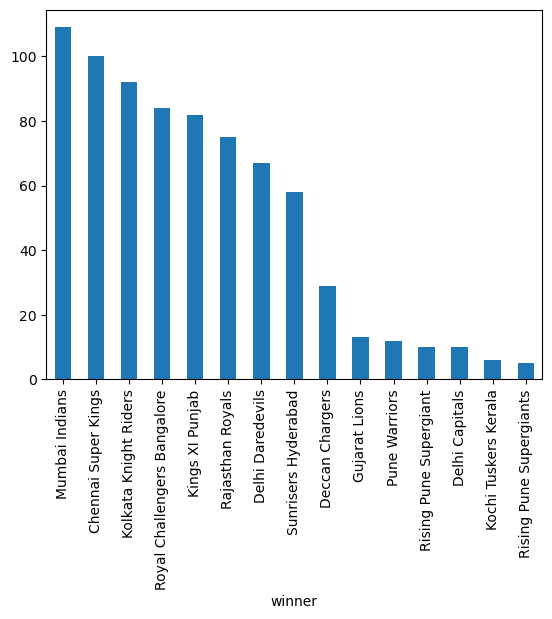

In [95]:
df['winner'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

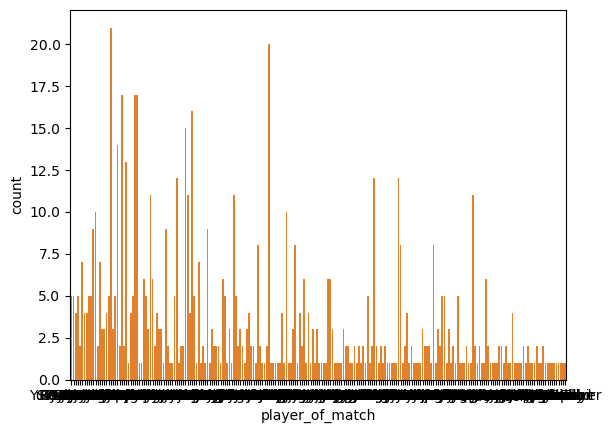

In [113]:
sns.countplot(df,x='player_of_match')
plt.show()

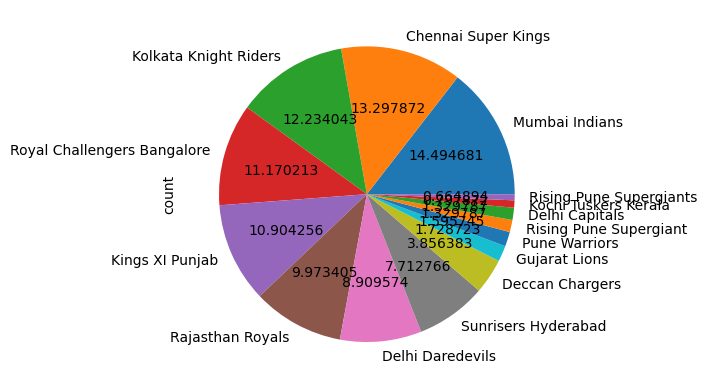

In [117]:
df['winner'].value_counts().plot(kind='pie',autopct='%2f')
plt.xticks(rotation=90)
plt.show()

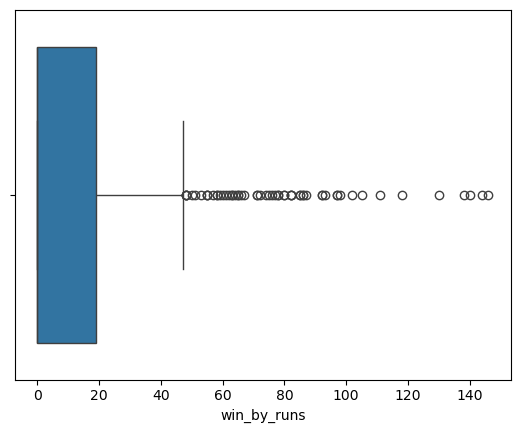

In [133]:
sns.boxplot(x=df['win_by_runs'])
plt.show()

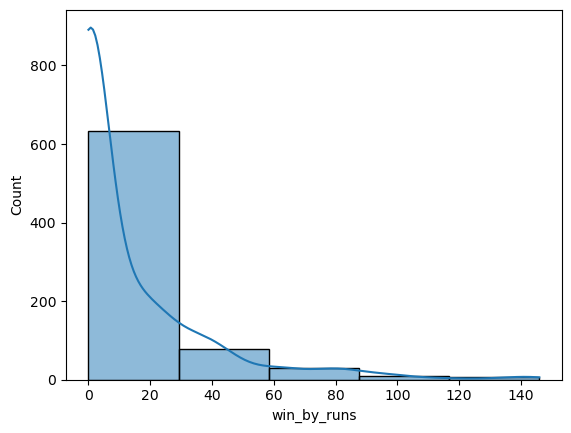

In [145]:
sns.histplot(df['win_by_runs'],kde=True,bins=5)
plt.show()

In [177]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [213]:
newframe=df.groupby('Season')[['win_by_runs','win_by_wickets']].sum()
newframe.shape

(12, 2)

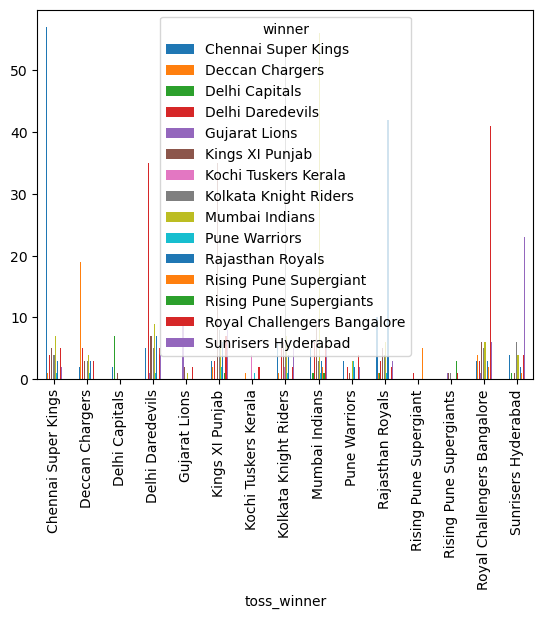

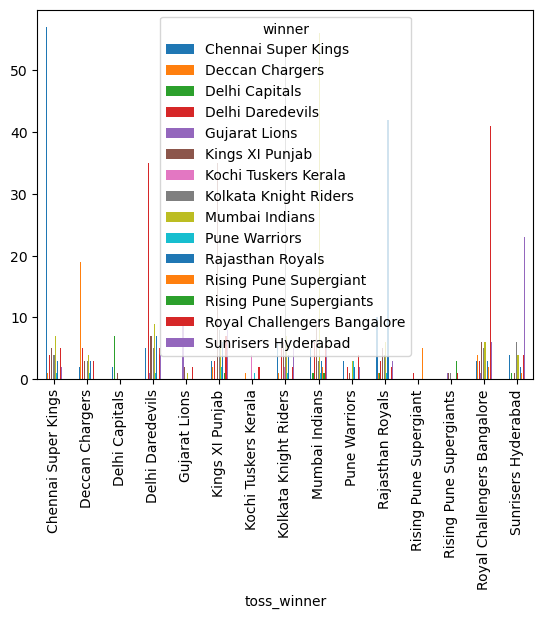

In [229]:
pd.crosstab(df['toss_winner'],df['winner']).plot(kind='bar')
plt.show()

In [251]:
new=df.groupby('Season')['win_by_runs'].sum().reset_index()

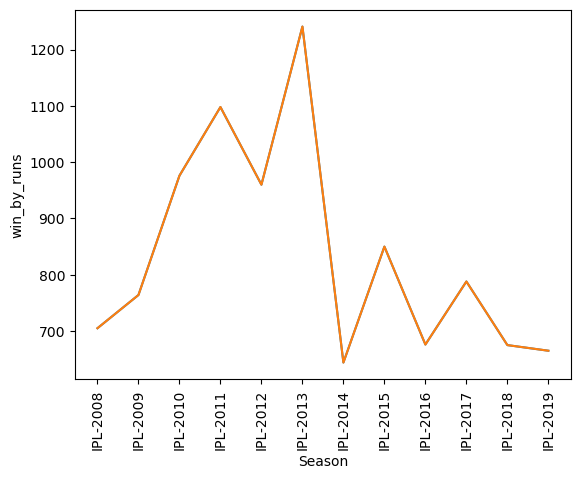

In [263]:
sns.lineplot(x=new['Season'],y=new['win_by_runs'])
plt.xticks(rotation=90)
plt.show()